In [2]:
import pandas as pd
import numpy as np
import gpelletier.stats.fonctions_univariees as gpfu
import gpelletier.stats.fonctions_bivariees as gpfb

#On ne prend pas en compte ENERGYSTARScore
data2015 = pd.read_csv('data2015_noEss.csv', sep=',')
data2015 = data2015.drop(columns='Unnamed: 0')

In [ ]:
#------------------------------#
#------------------------------#

In [ ]:
#Analyse pour la cible SiteEnergyUse:

In [2]:
#Correlation lineaire entre la cible SiteEnergyUse(kBtu) et les features quantitatives
gpfb.corr_tab_quanti_quanti(data2015.select_dtypes(exclude='object'), 'SiteEnergyUse(kBtu)', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,SiteEnergyUse(kBtu) corr with:,corr,p-value
18,GHGEmissions(MetricTonsCO2e),0.887696,0.000000e+00
5,LargestPropertyUseTypeGFA,0.710549,1.812494e-252
7,PropertyGFABuilding(s),0.691718,5.787033e-234
9,PropertyGFATotal,0.676523,4.831835e-220
12,SecondLargestPropertyUseTypeGFA,0.548749,1.095418e-129
8,PropertyGFAParking,0.313273,1.078475e-38
13,ThirdLargestPropertyUseTypeGFA,0.214450,1.592062e-18
6,OSEBuildingID,-0.205099,4.802256e-17
2,CouncilDistrictCode,0.106125,1.647699e-05
10,SPD Beats,-0.057419,2.001093e-02


In [ ]:
#On s'impose un seuil de correlation lineaire de 0.1 (i.e. on retient les features avec une correlation lienaire absolue > 0.1)
#On fait attention que ces features ne soient pas trop correlees (ex : correlation > 0.9)
#Les features qu'on peut retenir sont:
#LargestPropertyUseTypeGFA, PropertyGFABuilding(s), PropertyGFATotal, SecondLargestPropertyUseTypeGFA, PropertyGFAParking, OSEBuildingID, ThirdLargestPropertyUseTypeGFA et CouncilDistrictCode

In [ ]:
#------------------------------#

In [3]:
#OSEBuildingID : 
len(data2015['OSEBuildingID']) - len(data2015['OSEBuildingID'].unique())

0

In [ ]:
#OSEBuildingID est un ID unique pour chaque donnee renseignee.
#Cette feature n'ait pas pertinente pour notre probleme.
#On la retire de notre liste de features a utiliser pour notre modele.

In [ ]:
#------------------------------#

In [4]:
#On discretise CouncilDistrictCode:
bins = [0, 1, 2, 3, 4, 5, 6, 7]
data2015['CouncilDistrictCode'] = pd.cut(data2015['CouncilDistrictCode'], bins)

In [ ]:
#------------------------------#

In [5]:
#Correlation (eta carre) entre la cible SiteEnergyUse(kBtu) et les features quanlitatives
gpfb.corr_tab_quanti_quali(pd.concat([data2015.select_dtypes(include=['object', 'category']), data2015['SiteEnergyUse(kBtu)']], axis=1), 'SiteEnergyUse(kBtu)', 0, 1)

Seuil (abs) = 0
SiteEnergyUse(kBtu) corr with:


,Feature,eta_squared
11,PropertyName,1.00
13,TaxParcelIdentificationNumber,0.94
5,ListOfAllPropertyUseTypes,0.51
4,LargestPropertyUseType,0.41
10,PrimaryPropertyType,0.34
16,YearsENERGYSTARCertified,0.06
14,ThirdLargestPropertyUseType,0.05
6,Neighborhood,0.04
0,BuildingType,0.03
7,NumberofBuildings,0.02


In [ ]:
#On s'impose un seuil de correlation (eta carre) de 0.1 (i.e. on retient les features avec une correlation absolue > 0.1)
#On fait attention que ces features ne soient pas trop correlees (ex : correlation > 0.9)
#Les features qu'on peut retenir sont:
#ListOfAllPropertyUseTypes, LargestPropertyUseType, PrimaryPropertyType et NumberofFloors

#Remarque, en discretisant CouncilDistrictCode, celle-ci n'est pas assez correlee.
#On ne la retiendra pas.

In [ ]:
#------------------------------#
#------------------------------#

In [6]:
#Correlation entre les features:
features = data2015[['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'PrimaryPropertyType', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFATotal', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking', 'ThirdLargestPropertyUseTypeGFA']]

In [ ]:
#------------------------------#

In [ ]:
#Correlation features quantitative / quantitatives
# et quantitative / quanlitatives

In [7]:
#LargestPropertyUseTypeGFA: / quantitative
gpfb.corr_tab_quanti_quanti(features.select_dtypes(exclude=['object', 'category']), 'LargestPropertyUseTypeGFA', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,LargestPropertyUseTypeGFA corr with:,corr,p-value
2,PropertyGFATotal,0.960100,0.000000e+00
1,PropertyGFABuilding(s),0.958684,0.000000e+00
3,SecondLargestPropertyUseTypeGFA,0.686926,1.760311e-229
4,PropertyGFAParking,0.531017,4.713097e-120
5,ThirdLargestPropertyUseTypeGFA,0.306453,5.084811e-37


In [ ]:
#On constate que LargestPropertyUseTypeGFA, PropertyGFATotal et PropertyGFABuilding(s), quasiment, parfaitement correlees.
#On ne va garder qu'une seule de ces 3 features.
#On va garder LargestPropertyUseTypeGFA.

In [8]:
#LargestPropertyUseTypeGFA / quanlitatives :
gpfb.corr_tab_quanti_quali(pd.concat([features.select_dtypes(include=['object', 'category']), features['LargestPropertyUseTypeGFA']], axis=1), 'LargestPropertyUseTypeGFA', 0, 1)

Seuil (abs) = 0
LargestPropertyUseTypeGFA corr with:


,Feature,eta_squared
0,ListOfAllPropertyUseTypes,0.46
2,PrimaryPropertyType,0.26
1,LargestPropertyUseType,0.16


In [ ]:
#Il n'y a pas de valeurs aberrantes pour les correlations entre LargestPropertyUseTypeGFA et les autres features qualitatives.

In [ ]:
#------------------------------#

In [9]:
#SecondLargestPropertyUseTypeGFA: / quantitative
gpfb.corr_tab_quanti_quanti(features.select_dtypes(exclude=['object', 'category']), 'SecondLargestPropertyUseTypeGFA', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,SecondLargestPropertyUseTypeGFA corr with:,corr,p-value
2,PropertyGFATotal,0.770367,1.185758e-322
1,PropertyGFABuilding(s),0.741994,6.201337e-287
0,LargestPropertyUseTypeGFA,0.686926,1.760311e-229
4,PropertyGFAParking,0.528519,9.658437e-119
5,ThirdLargestPropertyUseTypeGFA,0.444712,1.655943e-80


In [10]:
#SecondLargestPropertyUseTypeGFA / quanlitatives :
gpfb.corr_tab_quanti_quali(pd.concat([features.select_dtypes(include=['object', 'category']), features['SecondLargestPropertyUseTypeGFA']], axis=1), 'SecondLargestPropertyUseTypeGFA', 0, 1)

Seuil (abs) = 0
SecondLargestPropertyUseTypeGFA corr with:


,Feature,eta_squared
0,ListOfAllPropertyUseTypes,0.65
1,LargestPropertyUseType,0.25
2,PrimaryPropertyType,0.21


In [ ]:
#Il n'y a pas de valeurs aberrantes pour les correlations entre SecondLargestPropertyUseTypeGFA et les autres features.

In [ ]:
#------------------------------#

In [11]:
#PropertyGFAParking: / quantitative
gpfb.corr_tab_quanti_quanti(features.select_dtypes(exclude=['object', 'category']), 'PropertyGFAParking', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,PropertyGFAParking corr with:,corr,p-value
2,PropertyGFATotal,0.628792,2.635079e-181
0,LargestPropertyUseTypeGFA,0.531017,4.713097e-120
3,SecondLargestPropertyUseTypeGFA,0.528519,9.658437e-119
1,PropertyGFABuilding(s),0.454451,2.010946e-84
5,ThirdLargestPropertyUseTypeGFA,0.324989,1.131346e-41


In [12]:
#PropertyGFAParking / quanlitatives :
gpfb.corr_tab_quanti_quali(pd.concat([features.select_dtypes(include=['object', 'category']), features['PropertyGFAParking']], axis=1), 'PropertyGFAParking', 0, 1)

Seuil (abs) = 0
PropertyGFAParking corr with:


,Feature,eta_squared
0,ListOfAllPropertyUseTypes,0.53
2,PrimaryPropertyType,0.19
1,LargestPropertyUseType,0.15


In [ ]:
#Il n'y a pas de valeurs aberrantes pour les correlations entre SecondLargestPropertyUseTypeGFA et les autres features.

In [ ]:
#------------------------------#

In [13]:
#ThirdLargestPropertyUseTypeGFA: / quantitative
gpfb.corr_tab_quanti_quanti(features.select_dtypes(exclude=['object', 'category']), 'ThirdLargestPropertyUseTypeGFA', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,ThirdLargestPropertyUseTypeGFA corr with:,corr,p-value
2,PropertyGFATotal,0.453124,6.985900e-84
3,SecondLargestPropertyUseTypeGFA,0.444712,1.655943e-80
1,PropertyGFABuilding(s),0.432681,7.641296e-76
4,PropertyGFAParking,0.324989,1.131346e-41
0,LargestPropertyUseTypeGFA,0.306453,5.084811e-37


In [14]:
#ThirdLargestPropertyUseTypeGFA / quanlitatives :
gpfb.corr_tab_quanti_quali(pd.concat([features.select_dtypes(include=['object', 'category']), features['ThirdLargestPropertyUseTypeGFA']], axis=1), 'ThirdLargestPropertyUseTypeGFA', 0, 1)

Seuil (abs) = 0
ThirdLargestPropertyUseTypeGFA corr with:


,Feature,eta_squared
0,ListOfAllPropertyUseTypes,0.78
2,PrimaryPropertyType,0.11
1,LargestPropertyUseType,0.07


In [ ]:
#Il n'y a pas de valeurs aberrantes pour les correlations entre SecondLargestPropertyUseTypeGFA et les autres features.

In [ ]:
#------------------------------#

In [ ]:
#Correlation features quanlitative / quanlitatives

In [15]:
features.select_dtypes(include=['object', 'category']).columns

Index(['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'PrimaryPropertyType', 'NumberofFloors'],
      dtype='object')

In [ ]:
#Cas des features LargestPropertyUseType et PrimaryPropertyType:

In [15]:
features[['LargestPropertyUseType', 'PrimaryPropertyType']][:10]

,LargestPropertyUseType,PrimaryPropertyType
0,Hotel,Hotel
1,Hotel,Hotel
2,Hotel,Hotel
3,Hotel,Hotel
4,Hotel,Hotel
5,Police Station,Other
6,Hotel,Hotel
7,Other - Entertainment/Public Assembly,Other
8,Hotel,Hotel
9,Hotel,Hotel


In [16]:
features['LargestPropertyUseType'].value_counts()[:20]

Office                                   477
Non-Refrigerated Warehouse               199
K-12 School                              130
Retail Store                             108
Other                                    106
Hotel                                     74
Worship Facility                          72
Distribution Center                       54
Medical Office                            45
Supermarket/Grocery Store                 38
Self-Storage Facility                     28
Parking                                   26
College/University                        21
Other - Recreation                        20
Other - Entertainment/Public Assembly     20
Senior Care Community                     19
Residence Hall/Dormitory                  16
Small- and Mid-Sized Office               13
Refrigerated Warehouse                    13
Restaurant                                12
Name: LargestPropertyUseType, dtype: int64

In [17]:
features['PrimaryPropertyType'].value_counts()[:20]

Small- and Mid-Sized Office    296
Other                          252
Non-Refrigerated Warehouse     187
Large Office                   170
K-12 School                    130
Mixed Use Property             106
Retail Store                    99
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              21
Senior Care Community           19
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    10
Hospital                        10
SPS-District K-12                4
Name: PrimaryPropertyType, dtype: int64

In [ ]:
#On constate que les elements contenus dans LargestPropertyUseType et PrimaryPropertyType sont tres semblables.
#Pour la suite, on choisira de garder LargestPropertyUseType.

Plus la valeur est proche de 0, plus les evenements sont independants
Plus la valeur est grande, plus les evenements semblent dependants : correlation possible!


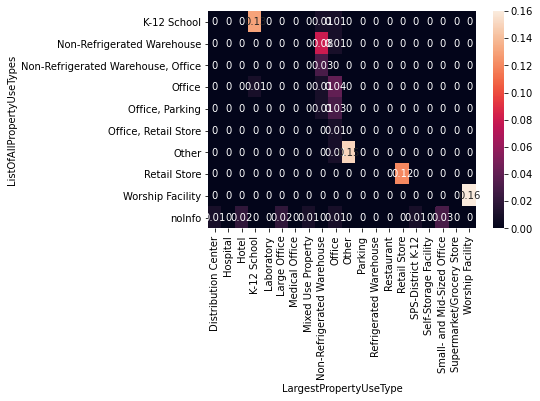

In [21]:
#ListOfAllPropertyUseTypes / LargestPropertyUseType
#On ne prend que les 10 etiquettes les plus representees dans ListOfAllPropertyUseTypes
gpfb.heat_map_col_quali(features[features['ListOfAllPropertyUseTypes'].isin(set(features['ListOfAllPropertyUseTypes'].value_counts()[:10].index))], 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType')

In [ ]:
#ListOfAllPropertyUseTypes et LargestPropertyUseType semblent independantes entre elles.

Plus la valeur est proche de 0, plus les evenements sont independants
Plus la valeur est grande, plus les evenements semblent dependants : correlation possible!


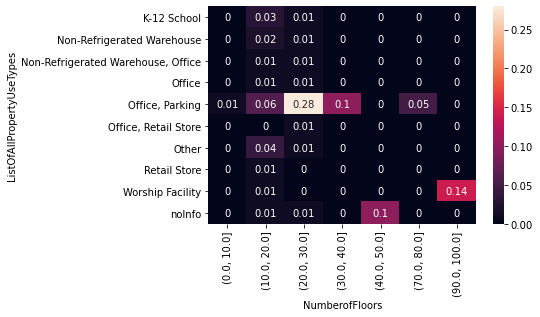

In [22]:
#ListOfAllPropertyUseTypes / NumberofFloors
#On ne prend que les 10 etiquettes les plus representees dans ListOfAllPropertyUseTypes
gpfb.heat_map_col_quali(features[features['ListOfAllPropertyUseTypes'].isin(set(features['ListOfAllPropertyUseTypes'].value_counts()[:10].index))], 'ListOfAllPropertyUseTypes', 'NumberofFloors')

In [ ]:
#ListOfAllPropertyUseTypes et NumberofFloors semblent independantes entre elles.

In [ ]:
#On peut garder ListOfAllPropertyUseTypes.

In [ ]:
#------------------------------#

Plus la valeur est proche de 0, plus les evenements sont independants
Plus la valeur est grande, plus les evenements semblent dependants : correlation possible!


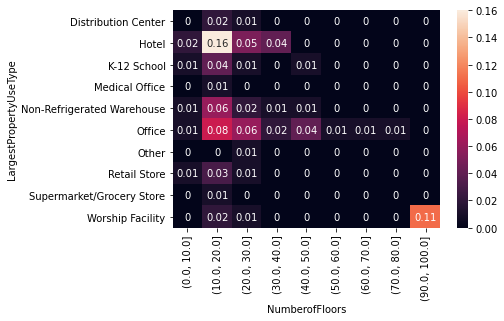

In [23]:
#LargestPropertyUseType / NumberofFloors
#On ne prend que les 10 etiquettes les plus representees dans LargestPropertyUseType
gpfb.heat_map_col_quali(features[features['LargestPropertyUseType'].isin(set(features['LargestPropertyUseType'].value_counts()[:10].index))], 'LargestPropertyUseType', 'NumberofFloors')

In [ ]:
#LargestPropertyUseType et NumberofFloors semblent independantes entre elles.

In [ ]:
#On peut garder LargestPropertyUseType.
#On peut garder NumberofFloors.

In [ ]:
#------------------------------#

In [ ]:
#En resume:
#
#Pour la prediction de SiteEnergyUse, on utilise les features suivantes:
#'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
#'PropertyGFAParking' et 'ThirdLargestPropertyUseTypeGFA'

In [3]:
features = data2015[['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking', 'ThirdLargestPropertyUseTypeGFA']]

In [ ]:
#------------------------------#
#------------------------------#

In [ ]:
#Analyse univariee de la cible SiteEnergyUse(kBtu):

In [25]:
data2015['SiteEnergyUse(kBtu)'].describe()

count    1.641000e+03
mean     7.703524e+06
std      1.890763e+07
min      1.144100e+04
25%      1.223425e+06
50%      2.474457e+06
75%      6.935723e+06
max      2.958126e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [26]:
#On passe au log:
np.log(data2015['SiteEnergyUse(kBtu)'] + 1).describe()

count    1641.000000
mean       14.888509
std         1.323541
min         9.345046
25%        14.017166
50%        14.721532
75%        15.752196
max        19.505237
Name: SiteEnergyUse(kBtu), dtype: float64

[array([10.69067138, 10.09108682, 10.88560348,  9.34504607, 10.94188972,
         9.74981176, 11.32448523, 19.34172745, 18.74012088, 19.50523684,
        18.72993905, 19.46753356, 18.36474605, 19.47389648, 18.56113922,
        18.36070406, 18.46925421, 18.87561186])]

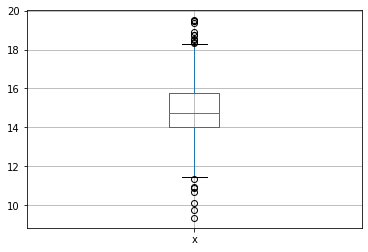

In [5]:
#Boxplot apres passage au log:
gpfu.liste_fliers_colonne(data2015, 'SiteEnergyUse(kBtu)')

mean:    14.889
median:  14.722
var:     1.751
ect:     1.323

Skewness de la colonne [SiteEnergyUse(kBtu)]:
La distribution est etalee a droite.
skewness: 0.200

Kurtosis de la colonne [SiteEnergyUse(kBtu)]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.530



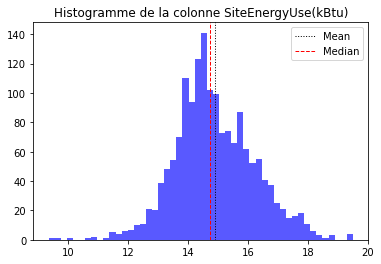

In [4]:
data2015['SiteEnergyUse(kBtu)'] = np.log(data2015['SiteEnergyUse(kBtu)'] + 1)
gpfu.show_hist_colonne(data2015, 'SiteEnergyUse(kBtu)')

In [ ]:
#La distribution de log(SiteEnergyUse(kBtu) + 1) peut etre consideree comme une distribution normale.

In [ ]:
#------------------------------#
#------------------------------#

In [ ]:
#Analyse univariee de ces features:

In [ ]:
#------------------------------#

In [26]:
#Variables quantitatives:
features.select_dtypes(exclude=['object', 'category']).columns

Index(['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'PropertyGFAParking', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [ ]:
#PropertyGFAParking:

In [27]:
features['PropertyGFAParking'].describe()

count      1582.000000
mean      13977.975348
std       44501.073249
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [28]:
#On passe au log:
np.log(features['PropertyGFAParking'] + 1).describe()

count    1581.000000
mean        2.248160
std         4.336814
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.147269
Name: PropertyGFAParking, dtype: float64

mean:    2.198
median:  0.000
var:     18.482
ect:     4.299

Skewness de la colonne [PropertyGFAParking]:
La distribution est etalee a droite.
skewness: 1.480

Kurtosis de la colonne [PropertyGFAParking]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.280



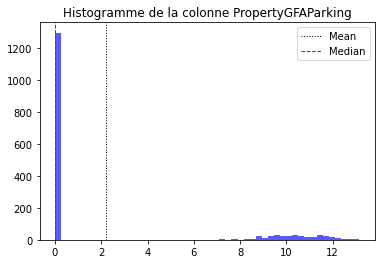

In [6]:
features['PropertyGFAParking'] = np.log(features['PropertyGFAParking'] + 1)
gpfu.show_hist_colonne(features, 'PropertyGFAParking')

In [ ]:
#Malgre une forte representation de valeurs nulles, la distribution log(PropertyGFAParking + 1) se rapproche d'une distribution normale.

In [ ]:
#------------------------------#

In [ ]:
#LargestPropertyUseTypeGFA:

In [30]:
features['LargestPropertyUseTypeGFA'].describe()

count    1.582000e+03
mean     9.289147e+04
std      1.603350e+05
min      5.872000e+03
25%      2.562725e+04
50%      4.408450e+04
75%      9.032525e+04
max      1.719643e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [31]:
#On passe au log:
np.log(features['LargestPropertyUseTypeGFA'] + 1).describe()

count    1582.000000
mean       10.859978
std         0.945536
min         8.678121
25%        10.151450
50%        10.693886
75%        11.411183
max        14.357628
Name: LargestPropertyUseTypeGFA, dtype: float64

mean:    10.853
median:  10.674
var:     0.900
ect:     0.948

Skewness de la colonne [LargestPropertyUseTypeGFA]:
La distribution est etalee a droite.
skewness: 0.890

Kurtosis de la colonne [LargestPropertyUseTypeGFA]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.710



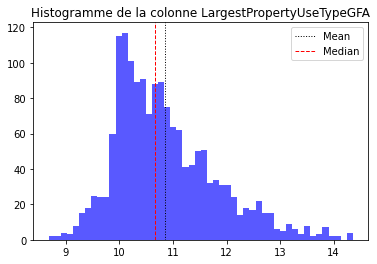

In [8]:
features['LargestPropertyUseTypeGFA'] = np.log(features['LargestPropertyUseTypeGFA'] + 1)
gpfu.show_hist_colonne(features, 'LargestPropertyUseTypeGFA')

In [ ]:
#La distribution de log(LargestPropertyUseTypeGFA + 1) peut etre consideree comme une distribution normale.

In [ ]:
#------------------------------#

In [ ]:
#SecondLargestPropertyUseTypeGFA:

In [33]:
features['SecondLargestPropertyUseTypeGFA'].describe()

count      1582.000000
mean      18033.877370
std       49648.227301
min           0.000000
25%           0.000000
50%           0.000000
75%       12712.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [34]:
#On passe au log:
np.log(features['SecondLargestPropertyUseTypeGFA'] + 1).describe()

count    1582.000000
mean        4.394614
std         4.924796
min         0.000000
25%         0.000000
50%         0.000000
75%         9.450380
max        13.439727
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

mean:    4.395
median:  0.000
var:     24.238
ect:     4.923

Skewness de la colonne [SecondLargestPropertyUseTypeGFA]:
La distribution est etalee a droite.
skewness: 0.290

Kurtosis de la colonne [SecondLargestPropertyUseTypeGFA]:
Les observations sont moins concentrées : la distribution est plus aplatie.
kurtosis: -1.790



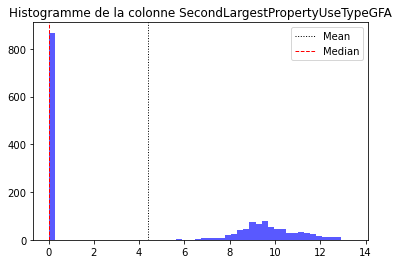

In [35]:
features['SecondLargestPropertyUseTypeGFA'] = np.log(features['SecondLargestPropertyUseTypeGFA'] + 1)
gpfu.show_hist_colonne(features, 'SecondLargestPropertyUseTypeGFA')

In [ ]:
#Malgre une forte representation de valeurs nulles, la distribution log(SecondLargestPropertyUseTypeGFA + 1) se rapproche d'une distribution normale.

In [ ]:
#------------------------------#

In [ ]:
#ThirdLargestPropertyUseTypeGFA:

In [36]:
features['ThirdLargestPropertyUseTypeGFA'].describe()

count      1582.000000
mean       2569.156131
std       13506.500946
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      303910.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

In [37]:
#On passe au log:
np.log(features['ThirdLargestPropertyUseTypeGFA'] + 1).describe()

count    1582.000000
mean        1.604166
std         3.432137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.624490
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

mean:    1.604
median:  0.000
var:     11.772
ect:     3.431

Skewness de la colonne [ThirdLargestPropertyUseTypeGFA]:
La distribution est etalee a droite.
skewness: 1.730

Kurtosis de la colonne [ThirdLargestPropertyUseTypeGFA]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 1.130



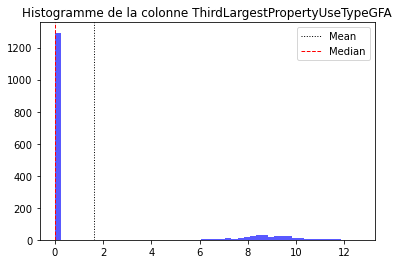

In [38]:
features['ThirdLargestPropertyUseTypeGFA'] = np.log(features['ThirdLargestPropertyUseTypeGFA'] + 1)
gpfu.show_hist_colonne(features, 'ThirdLargestPropertyUseTypeGFA')

In [ ]:
#Malgre une forte representation de valeurs nulles, la distribution log(ThirdLargestPropertyUseTypeGFA + 1) se rapproche d'une distribution normale.

In [ ]:
#------------------------------#
#------------------------------#

In [39]:
#Variables qualitatives:
features.select_dtypes(include=['object', 'category']).columns

Index(['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'NumberofFloors'],
      dtype='object')

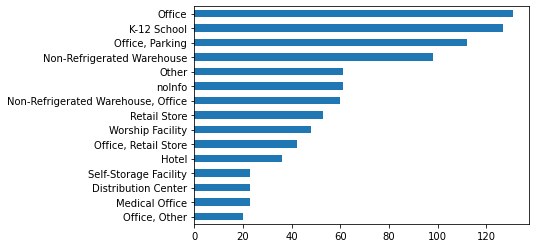

In [28]:
#ListOfAllPropertyUseTypes: top 15 des categories les plus representees
features['ListOfAllPropertyUseTypes'].value_counts()[:15].plot.barh().invert_yaxis()

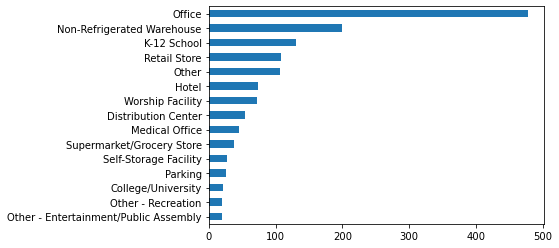

In [29]:
#LargestPropertyUseType: top 15 des categories les plus representees
features['LargestPropertyUseType'].value_counts()[:15].plot.barh().invert_yaxis()

In [ ]:
#Les donnees representent, en grande partie, des bureaux et des ecoles.

In [ ]:
#------------------------------#

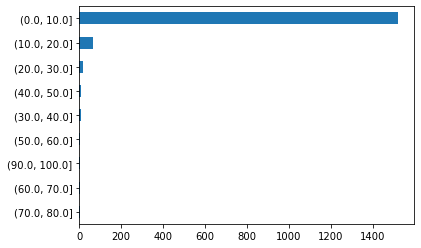

In [30]:
#NumberofFloors: top 15 des categories les plus representees
features['NumberofFloors'].value_counts()[:15].plot.barh().invert_yaxis()

In [ ]:
#Les donnees etudiees representent majoritairement des batiments contenant moins de 10 etages.